<a href="https://colab.research.google.com/github/Cordobes1974/DataScience/blob/main/ProyectoDS_ParteI_Rodrigo_Casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# Imports de bibliotecas para manipulación de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Imports de bibliotecas para modelado y aprendizaje automático
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc
import sklearn.datasets
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Hipótesis.

Seguiré éstos pasos:

1) Definir el objetivo de la Hipótesis.

Quiero investigar o demostrar, por ejemplo: Analizar si ciertos factores, influyen en la recuperación de pacientes, con una enfermedad específica.

Cúales Enfermedades se dan en mayor cantidad?

Hay vinculación con La Edad y/o el Género de los Pacientes?

2) Seleccionar las variables: Identificar las variables dependientes e independientes en el dataset. Por ejemplo, tener variables como edad, género, historial médico, tratamientos recibidos, etc.

3) Formular la Hipótesis: Redactar una hipótesis clara y comprobable.

4) Preparar el Dataset: Trabajaré para asegurarme de que el dataset esté limpio y listo para el análisis.
Esto incluye manejar datos faltantes, normalizar variables, etc.

5) Análisis de Datos: Utilizar Técnicas Estadísticas, para analizar los datos y probar la Hipótesis.

6) Interpretar los resultados: Analizar los resultados obtenidos, para ver si apoyan o refutan mi hipótesis.

Asegurarme de considerar posibles sesgos o limitaciones en el análisis.

# Obtención del Dataset:

Me ha costado encontrar un dataset completo, que se adecúe a las condiciones requeridas.

Finalmente, he tomado éste Dataset, desde la página web de Kaggle.
En el siguiente Link:
https://www.kaggle.com/datasets/prasad22/healthcare-dataset

Información brindada por el autor del Dataset:

Contexto:
Este conjunto de datos sintéticos de atención médica, se creó para servir como un recurso valioso para los entusiastas de la ciencia de datos, el aprendizaje automático y el análisis de datos. Está diseñado para imitar datos de atención médica del mundo real, lo que permite a los usuarios practicar, desarrollar y mostrar sus habilidades de manipulación y análisis de datos en el contexto de la industria de la atención médica.

Inspiración:
La inspiración detrás de este conjunto de datos, se basa en la necesidad de datos sanitarios prácticos y diversos para fines educativos y de investigación. Los datos sanitarios suelen ser sensibles y estar sujetos a normas de privacidad, lo que dificulta su acceso para el aprendizaje y la experimentación. Para abordar esta brecha, he aprovechado la biblioteca Faker de Python, para generar un conjunto de datos que refleje la estructura y los atributos que se encuentran comúnmente en los registros sanitarios. Al proporcionar estos datos sintéticos, espero fomentar la innovación, el aprendizaje y el intercambio de conocimientos en el ámbito de la analítica sanitaria.

Dataset Information:
Cada columna proporciona información específica sobre el paciente, su ingreso y los servicios de atención médica brindados, lo que hace que este conjunto de datos sea adecuado para diversas tareas de análisis y modelado de datos en el ámbito de la atención médica.

In [79]:
pathCurso = '/content/drive/MyDrive/COMISION61170-RODRIGOCASAS'

In [80]:
# Importación de datos
healthcare=pd.read_csv(pathCurso+'/healthcare_dataset.csv')
healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30.0,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328.0,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62.0,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265.0,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76.0,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205.0,Emergency,2022-10-07,Aspirin,Normal
3,"andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,adrIENNE bEll,43.0,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458.0,Urgent,2022-10-09,Penicillin,Abnormal


In [81]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 36865 non-null  float64
 2   Gender              36865 non-null  object 
 3   Blood Type          36865 non-null  object 
 4   Medical Condition   36865 non-null  object 
 5   Date of Admission   36865 non-null  object 
 6   Doctor              36865 non-null  object 
 7   Hospital            36865 non-null  object 
 8   Insurance Provider  36865 non-null  object 
 9   Billing Amount      36865 non-null  float64
 10  Room Number         36865 non-null  float64
 11  Admission Type      36865 non-null  object 
 12  Discharge Date      36865 non-null  object 
 13  Medication          36865 non-null  object 
 14  Test Results        36865 non-null  object 
dtypes: float64(3), object(12)
memory usage: 6.4+ MB


In [82]:
healthcare.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [83]:
healthcare.describe()

,Age,Billing Amount,Room Number
count,36865.000000,36865.000000,36865.000000
mean,51.510294,25528.172907,300.815028
std,19.570159,14206.080659,115.229996
min,13.000000,-2008.492140,101.000000
25%,35.000000,13235.381859,202.000000
50%,52.000000,25569.433899,301.000000
75%,68.000000,37739.781412,400.000000
max,89.000000,52764.276736,500.000000


In [84]:
healthcare.dtypes

Name                   object
Age                   float64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number           float64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [108]:
healthcare.dtypes.value_counts()

object     12
float64     3
Name: count, dtype: int64

In [85]:
healthcare.shape

(55500, 15)

In [86]:
healthcare.size

832500

In [87]:
healthcare.index

RangeIndex(start=0, stop=55500, step=1)

In [88]:
healthcare.ndim

2

In [89]:
healthcare

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30.0,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328.0,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62.0,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265.0,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76.0,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205.0,Emergency,2022-10-07,Aspirin,Normal
3,"andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,adrIENNE bEll,43.0,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458.0,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42.0,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417.0,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61.0,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316.0,Elective,2020-02-01,Aspirin,Normal
55497,"HEATher WaNG,38,Female,B+,Hypertension,2020-07...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55498,"JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
healthcare.isnull().sum()

Name                      0
Age                   18635
Gender                18635
Blood Type            18635
Medical Condition     18635
Date of Admission     18635
Doctor                18635
Hospital              18635
Insurance Provider    18635
Billing Amount        18635
Room Number           18635
Admission Type        18635
Discharge Date        18635
Medication            18635
Test Results          18635
dtype: int64

In [91]:
healthcare.dropna(inplace=True)

# **Limpieza y transformación de datos**

# Eliminación de Valores NaN (Not a Number).
Verifico una gran cantidad de datos NaN, (18.635);

Donde salvo el campo Name, (En Con Cero valor faltante); en los otros datos, se mantiene la misma cantidad de faltantes. Es Constante.

Decido eliminarlos, ya que entorpece al modelo con el que estoy trabajando.

In [92]:
# Corroboro que no queden valores nulos
healthcare.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [113]:
# Calculo las estadísticas descriptivas del dataframe
healthcare.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,36865.0,51.510294,19.570159,13.00000,35.000000,52.000000,68.000000,89.000000
Billing Amount,36865.0,25528.172907,14206.080659,-2008.49214,13235.381859,25569.433899,37739.781412,52764.276736
Room Number,36865.0,300.815028,115.229996,101.00000,202.000000,301.000000,400.000000,500.000000


In [112]:
healthcare.describe(include=['object']).T

,count,unique,top,freq
Name,36865,33203,DAvId muNoZ,3
Gender,36865,2,Female,18440
Blood Type,36865,8,B+,4664
Medical Condition,36865,6,Hypertension,6207
Date of Admission,36865,1827,2020-06-07,42
Doctor,36865,28294,Robert Smith,15
Hospital,36865,23084,LLC Smith,44
Insurance Provider,36865,5,Cigna,7460
Admission Type,36865,3,Urgent,12374
Discharge Date,36865,1855,2023-07-09,40


In [114]:
# Valores duplicados
healthcare.duplicated().sum()

369

# Valores Outliers

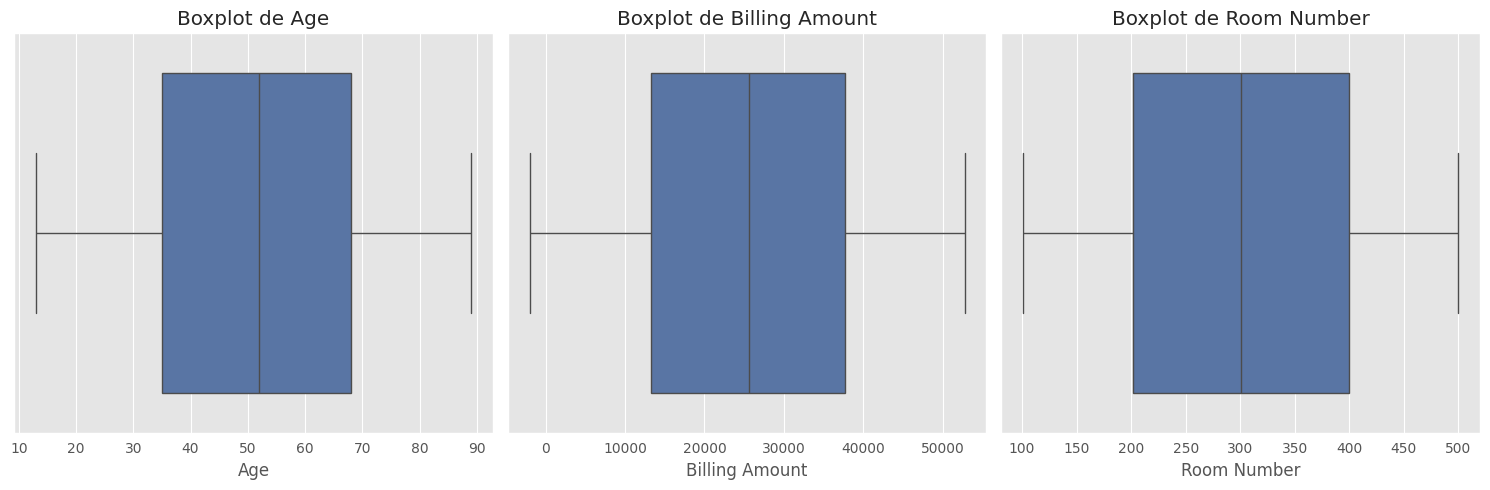

In [116]:
numeric_columns = healthcare.select_dtypes(include=['int64', 'float64'])

# Calcular el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5*num_rows))

# Generar y mostrar los diagramas de caja para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=healthcare[col])
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()

In [93]:
healthcare["Age"]

0        30.0
1        62.0
2        76.0
4        43.0
5        36.0
         ... 
55493    57.0
55494    67.0
55495    42.0
55496    61.0
55499    53.0
Name: Age, Length: 36865, dtype: float64

In [94]:
# Definición de colores y estilo
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# Análisis Exploratorio de Datos (EDA)
A continuación, se incluye una breve explicación de cada columna del conjunto de datos:

Name:                 Nombre del Paciente

Age:                    Edad del Paciente

Gender:                 Género del Paciente

Blood Type:             Tipo de Sangre.

Medical Condition:      Condición Médica.

Date of Admission:      Fecha de Ingreso.

Doctor:                 Doctor que lo atiende.

Hospital:              Hospital en que ha sido internado.

Insurance Provider:     Proveedor de Seguros.

Billing Amount:        Monto de Facturación.

Room Number:            Número de Habitación.

Admission Type:         Tipo de Admisión.

Discharge Date:         Fecha de alta.

Medication:             Medicamento.

Test Results:           Resultados de la prueba.

In [95]:
# Tamaño del conjunto de datos
print("Filas, columnas: ", healthcare.shape)

# Nombres de las variables
print("\nNombres de las variables: \n", healthcare.columns)

# Tipo de datos de cada variable
print("\nTipos de datos: \n", healthcare.dtypes)

# Verificar la presencia de valores faltantes
print("\nValores faltantes: \n", healthcare.isnull().sum())

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas: \n", healthcare.describe(include=[np.number]))

# Frecuencia de valores únicos en las variables categóricas
for col in healthcare.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(healthcare[col].value_counts())

Filas, columnas:  (36865, 15)

Nombres de las variables: 
 Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

Tipos de datos: 
 Name                   object
Age                   float64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number           float64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

Valores faltantes: 
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor           

**Análisis Univariado**

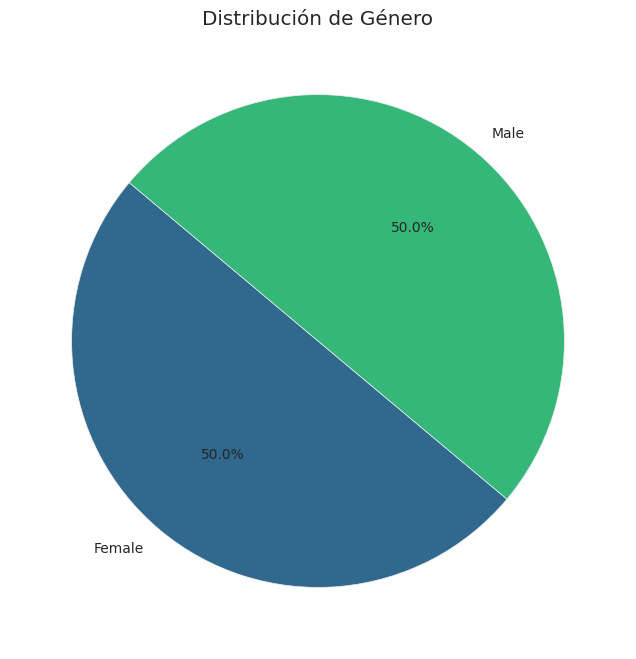

In [119]:
gender_counts = healthcare['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(gender_counts)))

plt.title('Distribución de Género')

plt.show()

**Análisis Bivariado**

<ipython-input-120-6bb87a055e5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Gender', data=healthcare, palette="viridis")


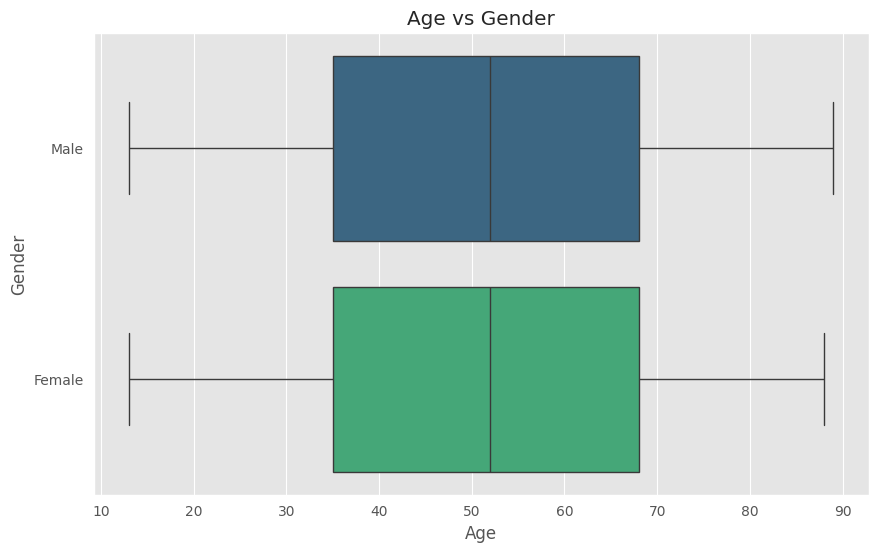

In [120]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Gender', data=healthcare, palette="viridis")
plt.title('Age vs Gender')
plt.show()

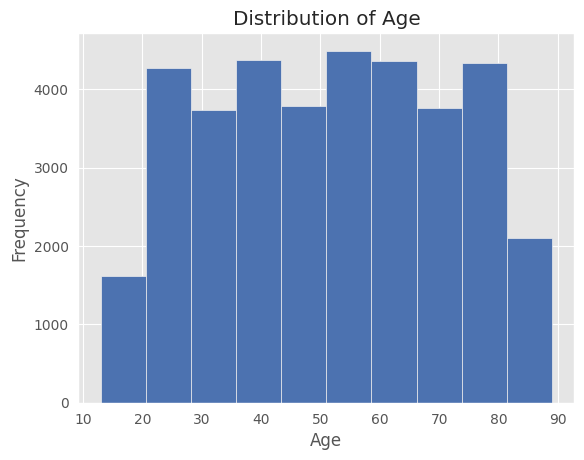

In [121]:
# Distribución por Edad
plt.hist(healthcare['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

**Análisis Multivariado**

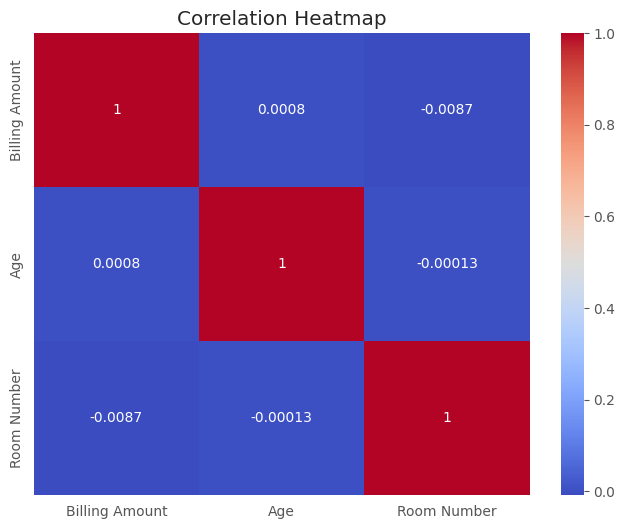

In [104]:
correlation_matrix = healthcare[['Billing Amount', 'Age', 'Room Number']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

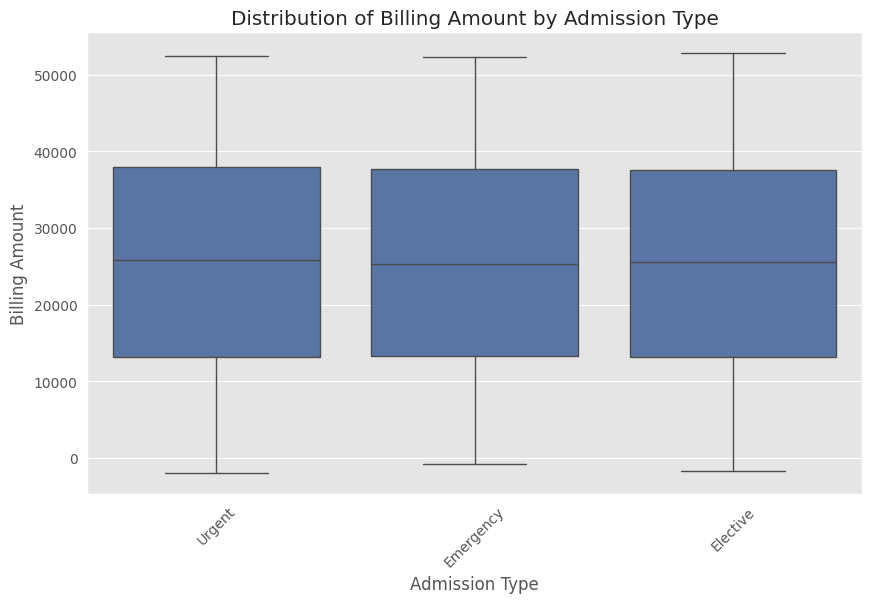

In [97]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.boxplot(x='Admission Type', y='Billing Amount', data=healthcare)
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.title('Distribution of Billing Amount by Admission Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

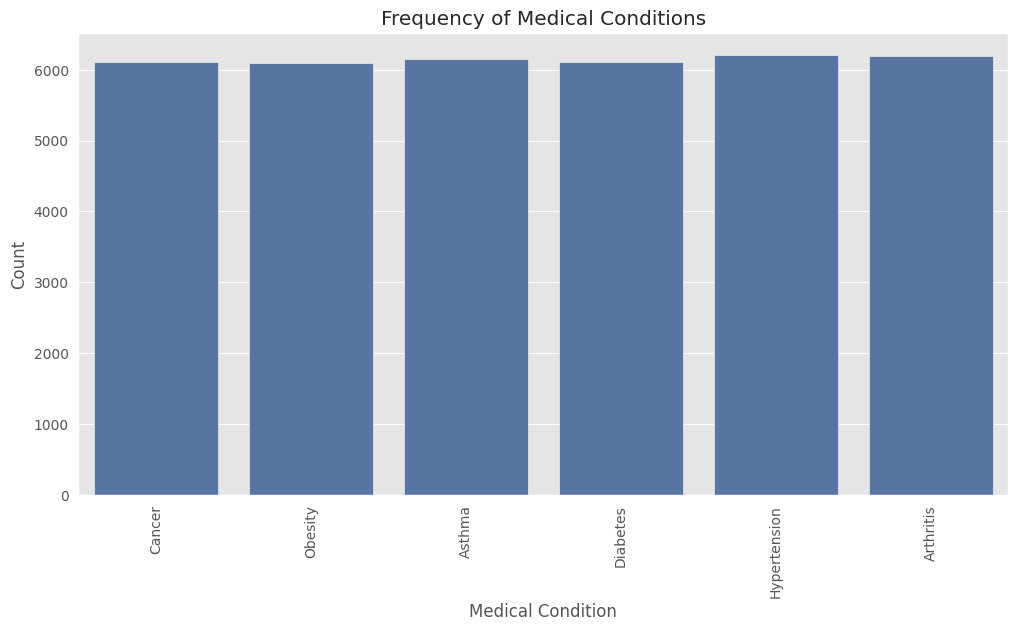

In [98]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.countplot(x='Medical Condition', data=healthcare)
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.title('Frequency of Medical Conditions')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

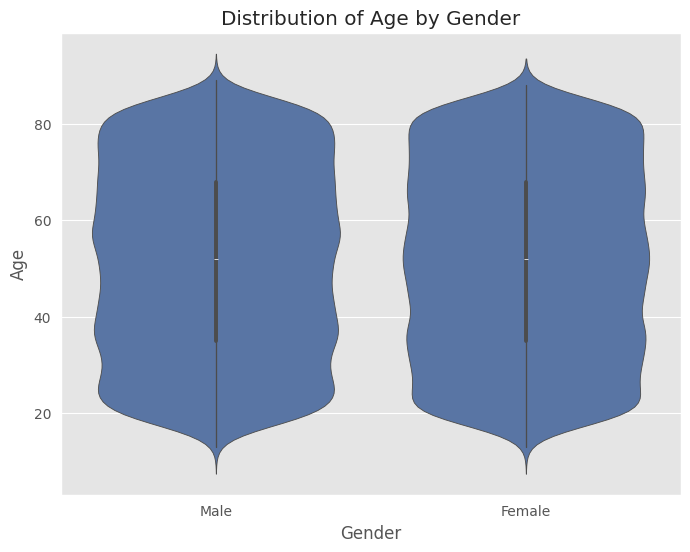

In [99]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Age', data=healthcare)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Distribution of Age by Gender')
plt.show()

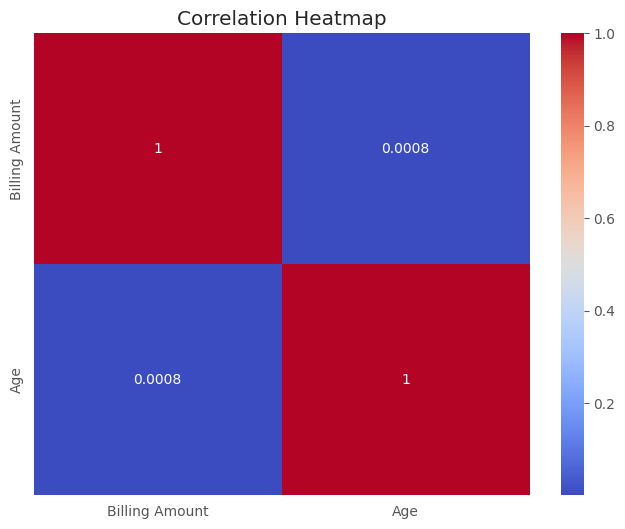

In [100]:
correlation_matrix = healthcare[['Billing Amount', 'Age']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Quiero comparar "Medical Condition", por "Gender" y "Age".

Gráfico de barras agrupadas:

Primero, agrupo los datos por "Gender", "Medical Condition" y calculo el promedio de edad para cada grupo.


In [105]:
grouped_data = healthcare.groupby(['Gender', 'Medical Condition'])['Age'].mean().reset_index()

Luego creo el gráfico de barras:

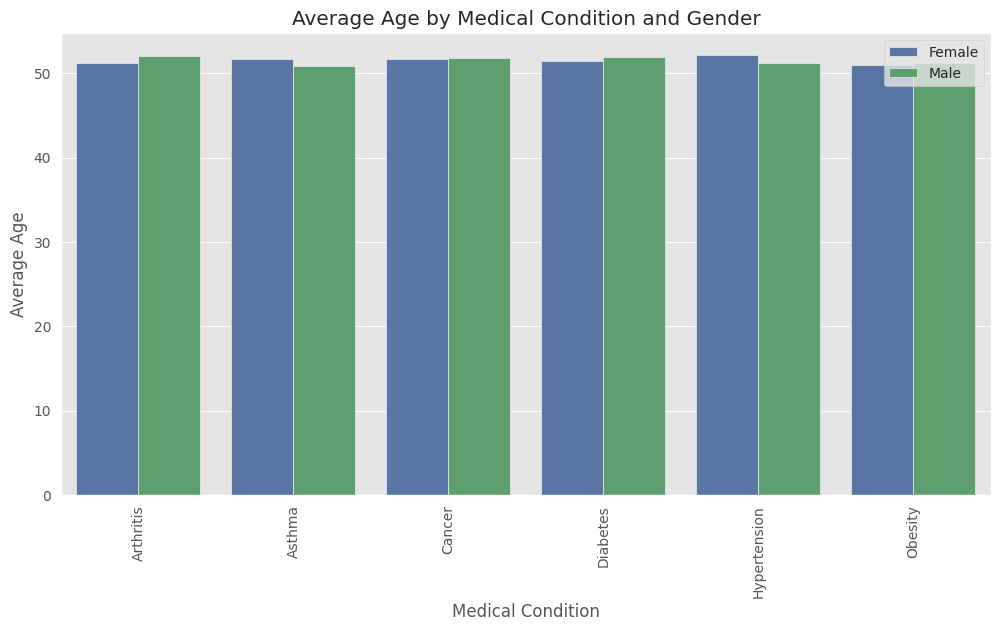

In [106]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Medical Condition', y='Age', hue='Gender', data=grouped_data)
plt.xlabel('Medical Condition')
plt.ylabel('Average Age')
plt.title('Average Age by Medical Condition and Gender')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Finalmente armo el gráfico de dispersión con codificación de color:

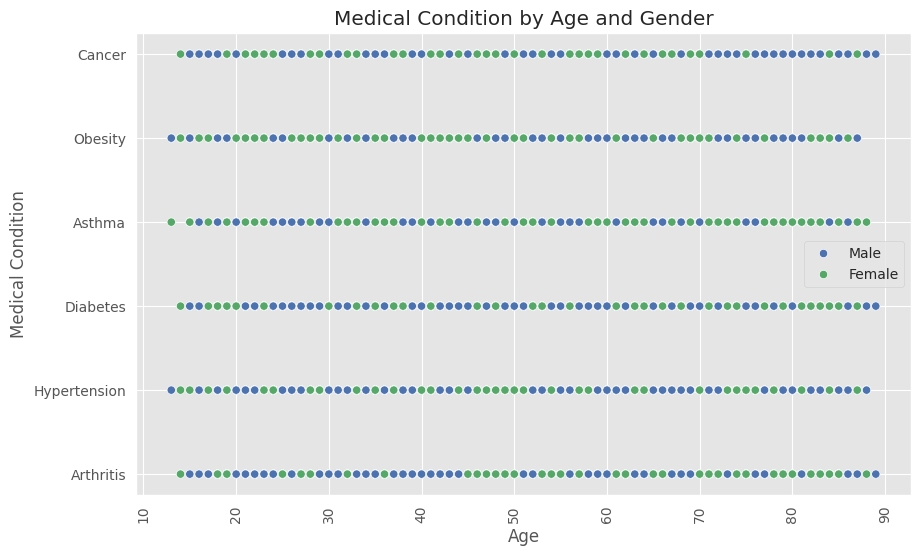

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Medical Condition', hue='Gender', data=healthcare)
plt.xlabel('Age')
plt.ylabel('Medical Condition')
plt.title('Medical Condition by Age and Gender')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Conclusiones del EDA

# Preprocesamiento de Datos

# Codificación de Variables Categóricas

In [122]:
healthcare_encoded = pd.get_dummies(healthcare, columns=['Gender', prefix='Gender', 'Blood Type', prefix= 'Blood Type', Admission_Type', prefix= 'Admission_Type', 'Medical Condition', prefix= 'Medical Condition','Test_Results', prefix= 'Test_Results'])
healthcare_encoded

AttributeError: 'DataFrame' object has no attribute 'get_dummies'